# Using the Ruptures Package for Change Point Detection

> Notes on the [Ruptures Documentation](https://centre-borelli.github.io/ruptures-docs/getting-started/basic-usage/) - code samples and images from the documentation as well

## References

- [Ruptures Library](https://github.com/deepcharles/ruptures/blob/master/docs/examples/introduction.md)
- [Charles Truong - Selective review of offline change point detection methods](https://charles.doffy.net/publication/sp-review-2020)

In [1]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.5/998.5 kB 1.2 MB/s eta 0:00:00


In [2]:
import ruptures as rpt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example using Generated Data

An example using Ruptures - adapted from the documentation

In the below diagram, the colors indicate the actual breakpoints and the lines indicate the estimated breakpoints

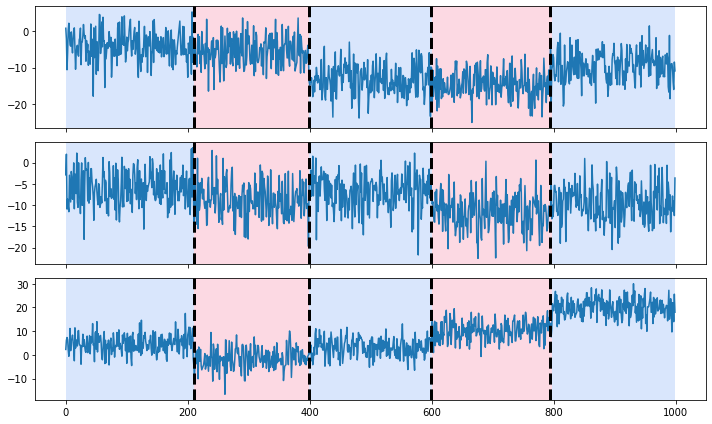

In [3]:
# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
model = rpt.Pelt(model="rbf")
model.fit(signal)

result = model.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.show()

# Fitting and Predicting

Ruptures models are largely based on the `sklearn` modelm structure

Making predictions and training can be done using `.fit()` and `.predict()` or `.fit_predict()` which calls both functions and returns the result

Ruptures has a few different algorithms available for detecting change points

All estimtors have the following that can be specified:

- `model` which is the cost function to use (one of: `l1`, `l2`, `rbf`)
- `cost` which is a custom cost function - should be an instance of `BaseCost`
- `jump` which is used to reduce the possible set of change point indexes
- `min_size` is the minimum number of samples between two change points

# Models

## Dynamic Programming (`Dynp

Finds the minimum of the sum of costs. In order to work the user must specify the number of changes to detect in advance

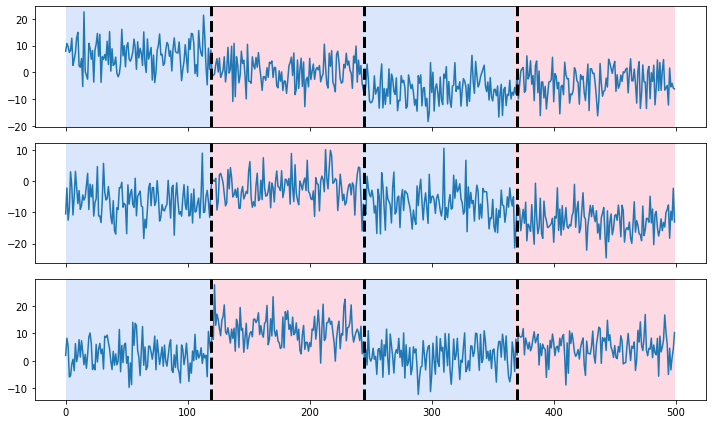

In [4]:
n, dim = 500, 3
n_bkps, sigma = 3, 5
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

## Linearly penalized segmentation (`Pelt`)

Relies on a pruning rule in which indexes are discarded. This reduces computational cost but retains the ability to find optimal segmentation

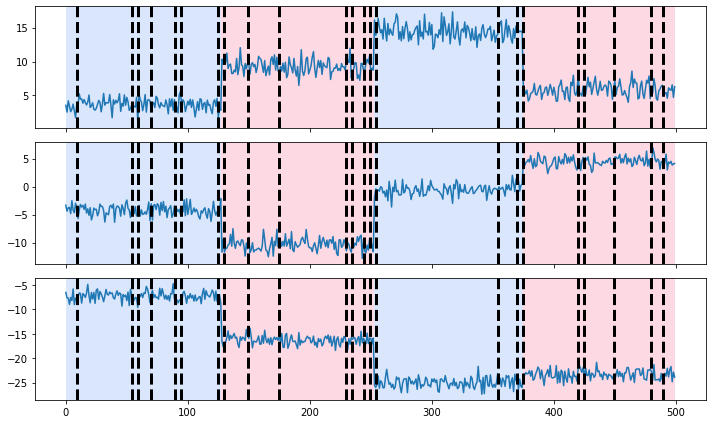

In [5]:
# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=3)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

# Binary segmentation (`Binseg`)

Used to perform fast signal segmentation. Works by splitting a signal at a changepoint and then splitting the subsequent signal to find the next nested changepont and so on

![Binary segmentation](https://centre-borelli.github.io/ruptures-docs/images/schema_binseg.png)

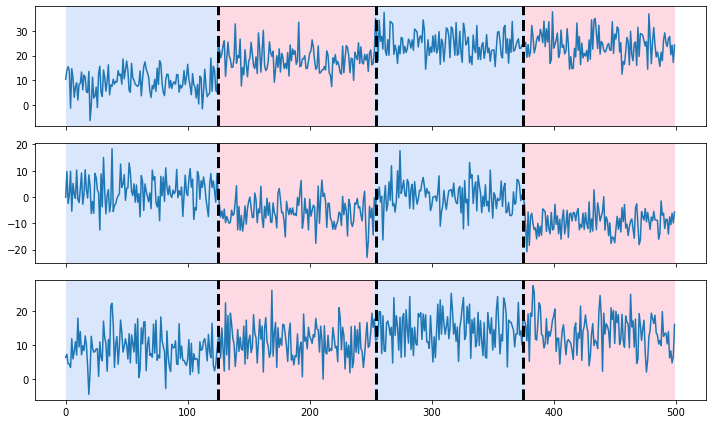

In [6]:
# creation of data
n = 500  # number of samples
n_bkps, sigma = 3, 5  # number of change points, noise standard deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

If the number of changepoints is not known it's possible to also speficy a penalty in the form of `pen` or the residual norm `epsilon`:

```py
my_bkps = algo.predict(pen=np.log(n) * dim * sigma**2)
# or
my_bkps = algo.predict(epsilon=3 * n * sigma**2)
```

## Bottom-up segmentation (`BottomUp`)

Used for fast change point detection and works by finding many changepoints and then deletes less significant ones

Can be used when the number of changepoints is known, if not it can be given a penalty or residual (same as `Binseg`)

![Bottom-up segmentation](https://centre-borelli.github.io/ruptures-docs/images/schema_tree.png)

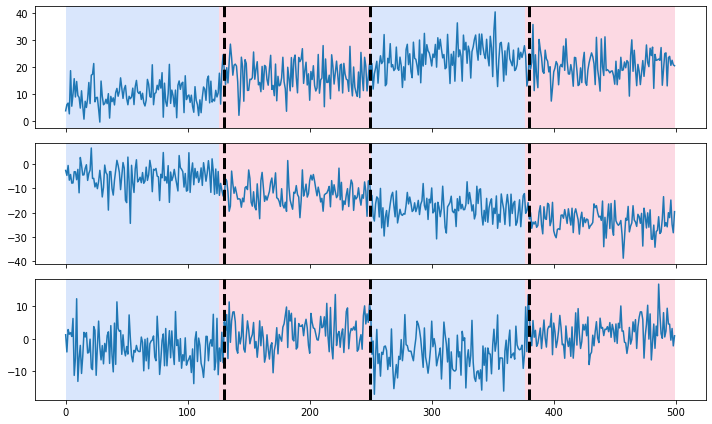

In [7]:
# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

# Window-based change point detection (`Window`)


Uses two windows that slide along the data stream and compares the statistical properties within them to each other using a discrepancy measure which is based on the cost function

Can be used when the number of changepoints is known, if not it can be given a penalty or residual (same as `Binseg`)

![Window-based change point detection](https://centre-borelli.github.io/ruptures-docs/images/schema_fenetre.png)

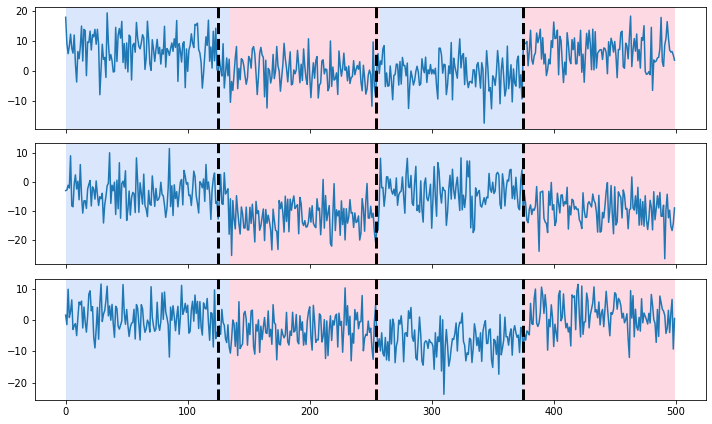

In [8]:
# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()